In [1]:
import pandas as pd
import numpy as np
import os 
import re
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
os.chdir("C:\\Users\\uppada satwik\\Downloads\\csv\\")

In [3]:
file ="adult.csv"
data=pd.read_csv(file)

In [4]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,Income,Unnamed: 16
0,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K,NaN,NaN
2,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K,NaN,NaN
3,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K,NaN,NaN
4,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K,NaN,NaN


In [5]:
data.columns= [re.sub("-","_",x) for x in data.columns] # change the - in headings to _

In [6]:
data.rename(columns={"Income":"income_num"},inplace=True)

In [7]:
data.head()

,age,workclass,fnlwgt,education,educational_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income,income_num,Unnamed: 16
0,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K,NaN,NaN
2,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K,NaN,NaN
3,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K,NaN,NaN
4,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K,NaN,NaN


we can see 0th row is having missing values, so we need to clean that

## Clean Numerical data

In [8]:
data[data.fnlwgt.isna()]

,age,workclass,fnlwgt,education,educational_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income,income_num,Unnamed: 16
0,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
data = data.iloc[1:data.shape[0],:]

In [10]:
data.head()

,age,workclass,fnlwgt,education,educational_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income,income_num,Unnamed: 16
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K,NaN,NaN
2,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K,NaN,NaN
3,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K,NaN,NaN
4,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K,NaN,NaN
5,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K,NaN,NaN


In [11]:
data[~data.fnlwgt.isna()]

,age,workclass,fnlwgt,education,educational_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income,income_num,Unnamed: 16
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K,NaN,NaN
2,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K,NaN,NaN
3,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K,NaN,NaN
4,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K,NaN,NaN
5,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48839,27,Private,257302.0,Assoc-acdm,12.0,Married-civ-spouse,Tech-support,Wife,White,Female,0.0,0.0,38.0,United-States,<=50K,7000.0,NaN
48840,40,Private,154374.0,HS-grad,9.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.0,0.0,40.0,United-States,>50K,7000.0,NaN
48841,58,Private,151910.0,HS-grad,9.0,Widowed,Adm-clerical,Unmarried,White,Female,0.0,0.0,40.0,United-States,<=50K,7000.0,NaN
48842,22,Private,201490.0,HS-grad,9.0,Never-married,Adm-clerical,Own-child,White,Male,0.0,0.0,20.0,United-States,<=50K,7000.0,NaN


In [12]:
data.shape

(48843, 17)

In [13]:
data.fnlwgt.nunique()

28523

In [14]:
data.drop_duplicates("fnlwgt",inplace=True)

In [15]:
data


,age,workclass,fnlwgt,education,educational_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income,income_num,Unnamed: 16
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K,NaN,NaN
3,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K,NaN,NaN
4,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K,NaN,NaN
5,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K,NaN,NaN
6,18,?,103497.0,Some-college,10.0,Never-married,?,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48820,30,Private,345898.0,HS-grad,9.0,Never-married,Craft-repair,Not-in-family,Black,Male,0.0,0.0,46.0,United-States,<=50K,7000.0,NaN
48823,45,State-gov,252208.0,HS-grad,9.0,Separated,Adm-clerical,Own-child,White,Female,0.0,0.0,40.0,United-States,<=50K,7000.0,NaN
48825,72,?,129912.0,HS-grad,9.0,Married-civ-spouse,?,Husband,White,Male,0.0,0.0,25.0,United-States,<=50K,7000.0,NaN
48832,43,State-gov,255835.0,Some-college,10.0,Divorced,Adm-clerical,Other-relative,White,Female,0.0,0.0,40.0,United-States,<=50K,7000.0,NaN


In [16]:
data.isnull().mean()*100

age                  0.000000
workclass            0.000000
fnlwgt               0.000000
education            0.000000
educational_num      0.000000
marital_status       0.000000
occupation           0.000000
relationship         0.000000
race                 0.000000
gender               0.000000
capital_gain         0.000000
capital_loss         0.000000
hours_per_week       0.000000
native_country       0.000000
income               0.000000
income_num           0.445255
Unnamed: 16        100.000000
dtype: float64

- Unames column has 100 % null values 
- we can see income_num is having some null values
, so let's drop them.

In [17]:
data.drop(['Unnamed: 16'],axis=1,inplace=True)

-  Droped  Unamed: 16 column

In [18]:
data.isnull().mean()*100

age                0.000000
workclass          0.000000
fnlwgt             0.000000
education          0.000000
educational_num    0.000000
marital_status     0.000000
occupation         0.000000
relationship       0.000000
race               0.000000
gender             0.000000
capital_gain       0.000000
capital_loss       0.000000
hours_per_week     0.000000
native_country     0.000000
income             0.000000
income_num         0.445255
dtype: float64

-  We can clean the income_num 
- it has less percentage of null values so that we can replace it with mean/median/mode

In [19]:
data['income_num']


1           NaN
3           NaN
4           NaN
5           NaN
6           NaN
          ...  
48820    7000.0
48823    7000.0
48825    7000.0
48832    7000.0
48839    7000.0
Name: income_num, Length: 28523, dtype: float64

- Here, we can see that 7000 is repeating more at last let's find their median,mode,mean

In [20]:
print("Median: ",data['income_num'].median())
print("Mean: ",data['income_num'].mean())
print("Mode: ",data['income_num'].mode())

Median:  7000.0
Mean:  7048.034934497817
Mode:  0    7000.0
Name: income_num, dtype: float64


- we can see median and mode are same 
- Let's go with the median
- Replace the null values with median of income_num

In [21]:
data['income_num'] = np.where(data['income_num'].isna(),data['income_num'].median(),data['income_num'])

In [22]:
data.isnull().mean()*100

age                0.0
workclass          0.0
fnlwgt             0.0
education          0.0
educational_num    0.0
marital_status     0.0
occupation         0.0
relationship       0.0
race               0.0
gender             0.0
capital_gain       0.0
capital_loss       0.0
hours_per_week     0.0
native_country     0.0
income             0.0
income_num         0.0
dtype: float64

- we can see that all null values are cleaned here

## Lets the numerical data

In [23]:
data.describe() # we can find count,max,min,std,25%,50%,75%,mean

,age,fnlwgt,educational_num,capital_gain,capital_loss,hours_per_week,income_num
count,28523.000000,2.852300e+04,28523.000000,28523.000000,28523.000000,28523.000000,28523.000000
mean,39.331943,1.983303e+05,9.904673,1007.039126,80.759037,39.528977,7047.821057
std,14.879500,1.143999e+05,2.602177,7282.382848,387.372361,12.716470,4330.447937
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,5000.000000
25%,27.000000,1.186425e+05,9.000000,0.000000,0.000000,37.000000,7000.000000
50%,37.000000,1.834100e+05,10.000000,0.000000,0.000000,40.000000,7000.000000
75%,50.000000,2.545405e+05,12.000000,0.000000,0.000000,44.000000,7000.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000,500000.000000


- we can see a null default value of capital_gain in the table above
  - we know that by default it may have chance to fill the values with 9999,99999,99999 ...
- as we see mean of the capital_gain is 1007 but the last value was 99999, it is bit fishy ,so we clean it with median again

In [24]:
data['capital_gain']=np.where(data['capital_gain']==99999,data['capital_gain'].median(),data['capital_gain'])

In [25]:
data.describe()

,age,fnlwgt,educational_num,capital_gain,capital_loss,hours_per_week,income_num
count,28523.000000,2.852300e+04,28523.000000,28523.000000,28523.000000,28523.000000,28523.000000
mean,39.331943,1.983303e+05,9.904673,526.729797,80.759037,39.528977,7047.821057
std,14.879500,1.143999e+05,2.602177,2395.343963,387.372361,12.716470,4330.447937
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,5000.000000
25%,27.000000,1.186425e+05,9.000000,0.000000,0.000000,37.000000,7000.000000
50%,37.000000,1.834100e+05,10.000000,0.000000,0.000000,40.000000,7000.000000
75%,50.000000,2.545405e+05,12.000000,0.000000,0.000000,44.000000,7000.000000
max,90.000000,1.490400e+06,16.000000,41310.000000,4356.000000,99.000000,500000.000000


- we can see that max of capital_gain has been changed

### All the nummerical data is been set

#### lets go for non-numerical data 

In [26]:
data.columns


Index(['age', 'workclass', 'fnlwgt', 'education', 'educational_num',
       'marital_status', 'occupation', 'relationship', 'race', 'gender',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income', 'income_num'],
      dtype='object')

## Lets check one by one

## Checking age column

In [27]:
data['age'].unique()

array([25, 38, 28, 44, 18, 34, 29, 63, 24, 55, 65, 36, 26, 58, 48, 43, 20,
       37, 40, 72, 45, 22, 23, 54, 32, 46, 56, 17, 39, 52, 21, 42, 33, 30,
       47, 41, 19, 69, 50, 31, 59, 49, 51, 27, 57, 61, 64, 79, 73, 53, 77,
       80, 62, 35, 68, 66, 75, 60, 67, 71, 70, 90, 81, 74, 78, 82, 85, 76,
       84, 83, 88, 87], dtype=int64)

- all the values are fine

## Checking workclass column

In [28]:
data['workclass'].unique()

array(['Private', 'Local-gov', '?', 'Self-emp-not-inc', 'Federal-gov',
       'State-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

- we can see one abnormal data (?)

- find out how much percentage of data is filled with ?

In [29]:
data['workclass'].value_counts(normalize=True)*100

workclass
Private             68.548189
Self-emp-not-inc     7.618413
?                    6.927743
Local-gov            6.468464
State-gov            4.305297
Self-emp-inc         3.123795
Federal-gov          2.934474
Without-pay          0.052589
Never-worked         0.021036
Name: proportion, dtype: float64

- Here, We can find 6.9 percent of data is filled with ? 
- if it is more than 30 we can drop it but now it is just approx of 7% we can update it with some other value

- as private work class is having more percentage let's go with mode

In [30]:
data['workclass']=np.where(data['workclass']=="?",data['workclass'].mode(),data['workclass'])

In [31]:
data['workclass'].value_counts(normalize=True)*100

workclass
Private             75.475932
Self-emp-not-inc     7.618413
Local-gov            6.468464
State-gov            4.305297
Self-emp-inc         3.123795
Federal-gov          2.934474
Without-pay          0.052589
Never-worked         0.021036
Name: proportion, dtype: float64

- we can see ? was replaced with Private

## Checking education column

In [32]:
data['education'].unique()

array(['11th', 'HS-grad', 'Assoc-acdm', 'Some-college', '10th',
       'Prof-school', '7th-8th', 'Bachelors', 'Masters', 'Doctorate',
       '5th-6th', 'Assoc-voc', '9th', '12th', '1st-4th', 'Preschool'],
      dtype=object)

- all are fine 

## Checking educational number

In [33]:
data['educational_num'].unique()

array([ 7.,  9., 12., 10.,  6., 15.,  4., 13., 14., 16.,  3., 11.,  5.,
        8.,  2.,  1.])

## Checking marital status

In [34]:
data['marital_status'].unique()

array(['Never-married', 'Married-civ-spouse', 'Widowed', 'Divorced',
       'Separated', 'Married-spouse-absent', 'Married-AF-spouse'],
      dtype=object)

- all are fine


## Checking occupation

In [35]:
data['occupation'].unique()

array(['Machine-op-inspct', 'Farming-fishing', 'Protective-serv', '?',
       'Other-service', 'Prof-specialty', 'Craft-repair', 'Adm-clerical',
       'Exec-managerial', 'Tech-support', 'Sales', 'Priv-house-serv',
       'Transport-moving', 'Handlers-cleaners', 'Armed-Forces'],
      dtype=object)

- Here we have an abnormal value (?)

In [36]:
data['occupation'].value_counts(normalize=True)*100

occupation
Adm-clerical         12.091996
Prof-specialty       11.958770
Exec-managerial      11.559093
Craft-repair         11.331206
Sales                11.278617
Other-service        11.145391
?                     6.948778
Machine-op-inspct     6.289661
Transport-moving      4.547208
Handlers-cleaners     4.406970
Farming-fishing       3.004593
Tech-support          2.773201
Protective-serv       2.015917
Priv-house-serv       0.624058
Armed-Forces          0.024542
Name: proportion, dtype: float64

- we can see that ? have 6.9 percent of values 
- value is less than 30. so, we can update it with mode(Adm-clerical)


In [37]:
data['occupation']=np.where(data['occupation']=="?", data['occupation'].mode(),data['occupation'])

In [38]:
data['occupation'].value_counts(normalize=True)*100

occupation
Adm-clerical         19.040774
Prof-specialty       11.958770
Exec-managerial      11.559093
Craft-repair         11.331206
Sales                11.278617
Other-service        11.145391
Machine-op-inspct     6.289661
Transport-moving      4.547208
Handlers-cleaners     4.406970
Farming-fishing       3.004593
Tech-support          2.773201
Protective-serv       2.015917
Priv-house-serv       0.624058
Armed-Forces          0.024542
Name: proportion, dtype: float64

- see the "?" field is commpletely updated as Adm-clerical

## Checking relationship

In [39]:
data['relationship'].unique()

array(['Own-child', 'Husband', 'Not-in-family', 'Unmarried', 'Husbend',
       'Wife', 'Other-relative'], dtype=object)

- Here, we can see that 'Husbend' is abnormal
- we can replace it with "Husband"

In [40]:
data['relationship'] = np.where(data['relationship']=='Husbend','Husband',data['relationship'])

In [41]:
data['relationship'].unique()

array(['Own-child', 'Husband', 'Not-in-family', 'Unmarried', 'Wife',
       'Other-relative'], dtype=object)

- all are fine now


## Checking race

In [42]:
data['race'].unique()

array(['Black', 'White', 'Asian-Pac-Islander', 'Other',
       'Amer-Indian-Eskimo'], dtype=object)

- all are fine

## Checking gender

In [43]:
data['gender'].unique()

array(['Male', 'Female'], dtype=object)

- all are fine

## Checking native_country

In [44]:
data['native_country'].unique()

array(['United-States', '?', 'Peru', 'Guatemala', 'Mexico',
       'Dominican-Republic', 'Ireland', 'Germany', 'Philippines',
       'Thailand', 'Haiti', 'El-Salvador', 'Puerto-Rico', 'Vietnam',
       'South', 'Columbia', 'Japan', 'India', 'Cambodia', 'Poland',
       'Laos', 'England', 'Cuba', 'Taiwan', 'Italy', 'Canada', 'Portugal',
       'China', 'Nicaragua', 'Honduras', 'Iran', 'Scotland', 'Jamaica',
       'Ecuador', 'Yugoslavia', 'Hungary', 'Hong', 'Greece',
       'Trinadad&Tobago', 'Outlying-US(Guam-USVI-etc)', 'France',
       'Holand-Netherlands'], dtype=object)

- we can see here also a ? was found to be abnormal

In [45]:
data['native_country'].value_counts(normalize=True)*100

native_country
United-States                 89.759142
Mexico                         2.145637
?                              1.668829
Puerto-Rico                    0.497844
Germany                        0.424219
Philippines                    0.417207
Canada                         0.385654
Cuba                           0.364618
El-Salvador                    0.361112
England                        0.266452
Dominican-Republic             0.248922
India                          0.245416
Columbia                       0.213862
Jamaica                        0.210357
China                          0.199839
Japan                          0.196333
Guatemala                      0.189321
Haiti                          0.182309
South                          0.182309
Vietnam                        0.161273
Italy                          0.154261
Poland                         0.150756
Portugal                       0.143744
Taiwan                         0.126214
Peru                     

- Here, we have 1.6 % of ? abnormal values
- so we no need to remove it, just update with  mode

In [46]:
data['native_country'] = np.where(data['native_country']=='?',data['native_country'].mode(),data['native_country'])

In [47]:
data['native_country'].value_counts(normalize=True)*100

native_country
United-States                 91.427970
Mexico                         2.145637
Puerto-Rico                    0.497844
Germany                        0.424219
Philippines                    0.417207
Canada                         0.385654
Cuba                           0.364618
El-Salvador                    0.361112
England                        0.266452
Dominican-Republic             0.248922
India                          0.245416
Columbia                       0.213862
Jamaica                        0.210357
China                          0.199839
Japan                          0.196333
Guatemala                      0.189321
Haiti                          0.182309
South                          0.182309
Vietnam                        0.161273
Italy                          0.154261
Poland                         0.150756
Portugal                       0.143744
Taiwan                         0.126214
Peru                           0.119202
Nicaragua                

- Now, all are fine

## Checking income field

In [48]:
data['income'].unique()

array(['<=50K', '>50K'], dtype=object)

- both are fine

## Checking income_num

In [49]:
data['income_num'].unique()

array([  7000.,   5000., 200000.,  10000., 500000.,  90000.,  12000.,
        50000.,  60000.])

- all are fine

# Data is cleaned and ready for EDA part

In [50]:
data

,age,workclass,fnlwgt,education,educational_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income,income_num
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K,7000.0
3,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K,7000.0
4,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K,7000.0
5,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K,7000.0
6,18,Private,103497.0,Some-college,10.0,Never-married,Adm-clerical,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K,7000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48820,30,Private,345898.0,HS-grad,9.0,Never-married,Craft-repair,Not-in-family,Black,Male,0.0,0.0,46.0,United-States,<=50K,7000.0
48823,45,State-gov,252208.0,HS-grad,9.0,Separated,Adm-clerical,Own-child,White,Female,0.0,0.0,40.0,United-States,<=50K,7000.0
48825,72,Private,129912.0,HS-grad,9.0,Married-civ-spouse,Adm-clerical,Husband,White,Male,0.0,0.0,25.0,United-States,<=50K,7000.0
48832,43,State-gov,255835.0,Some-college,10.0,Divorced,Adm-clerical,Other-relative,White,Female,0.0,0.0,40.0,United-States,<=50K,7000.0


In [51]:
data.describe()

,age,fnlwgt,educational_num,capital_gain,capital_loss,hours_per_week,income_num
count,28523.000000,2.852300e+04,28523.000000,28523.000000,28523.000000,28523.000000,28523.000000
mean,39.331943,1.983303e+05,9.904673,526.729797,80.759037,39.528977,7047.821057
std,14.879500,1.143999e+05,2.602177,2395.343963,387.372361,12.716470,4330.447937
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,5000.000000
25%,27.000000,1.186425e+05,9.000000,0.000000,0.000000,37.000000,7000.000000
50%,37.000000,1.834100e+05,10.000000,0.000000,0.000000,40.000000,7000.000000
75%,50.000000,2.545405e+05,12.000000,0.000000,0.000000,44.000000,7000.000000
max,90.000000,1.490400e+06,16.000000,41310.000000,4356.000000,99.000000,500000.000000


In [52]:
data

,age,workclass,fnlwgt,education,educational_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income,income_num
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K,7000.0
3,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K,7000.0
4,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K,7000.0
5,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K,7000.0
6,18,Private,103497.0,Some-college,10.0,Never-married,Adm-clerical,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K,7000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48820,30,Private,345898.0,HS-grad,9.0,Never-married,Craft-repair,Not-in-family,Black,Male,0.0,0.0,46.0,United-States,<=50K,7000.0
48823,45,State-gov,252208.0,HS-grad,9.0,Separated,Adm-clerical,Own-child,White,Female,0.0,0.0,40.0,United-States,<=50K,7000.0
48825,72,Private,129912.0,HS-grad,9.0,Married-civ-spouse,Adm-clerical,Husband,White,Male,0.0,0.0,25.0,United-States,<=50K,7000.0
48832,43,State-gov,255835.0,Some-college,10.0,Divorced,Adm-clerical,Other-relative,White,Female,0.0,0.0,40.0,United-States,<=50K,7000.0


In [53]:
data['age']

1        25
3        38
4        28
5        44
6        18
         ..
48820    30
48823    45
48825    72
48832    43
48839    27
Name: age, Length: 28523, dtype: int64

## Differenciate Categorical variable from data

In [54]:
data.select_dtypes(include=['object','category'])

,workclass,education,marital_status,occupation,relationship,race,gender,native_country,income
1,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,United-States,<=50K
3,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States,<=50K
4,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States,>50K
5,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,United-States,>50K
6,Private,Some-college,Never-married,Adm-clerical,Own-child,White,Female,United-States,<=50K
...,...,...,...,...,...,...,...,...,...
48820,Private,HS-grad,Never-married,Craft-repair,Not-in-family,Black,Male,United-States,<=50K
48823,State-gov,HS-grad,Separated,Adm-clerical,Own-child,White,Female,United-States,<=50K
48825,Private,HS-grad,Married-civ-spouse,Adm-clerical,Husband,White,Male,United-States,<=50K
48832,State-gov,Some-college,Divorced,Adm-clerical,Other-relative,White,Female,United-States,<=50K


# UNI-VARIENT ANALYSIS OF OCCUPATION

In [55]:
data['occupation'].value_counts() # value for each occupation that is present in the dataframe

occupation
Adm-clerical         5431
Prof-specialty       3411
Exec-managerial      3297
Craft-repair         3232
Sales                3217
Other-service        3179
Machine-op-inspct    1794
Transport-moving     1297
Handlers-cleaners    1257
Farming-fishing       857
Tech-support          791
Protective-serv       575
Priv-house-serv       178
Armed-Forces            7
Name: count, dtype: int64

In [56]:
data['occupation'].value_counts().reset_index() # value for each occupation that is present in the dataframe represent in data frame 

,occupation,count
0,Adm-clerical,5431
1,Prof-specialty,3411
2,Exec-managerial,3297
3,Craft-repair,3232
4,Sales,3217
5,Other-service,3179
6,Machine-op-inspct,1794
7,Transport-moving,1297
8,Handlers-cleaners,1257
9,Farming-fishing,857


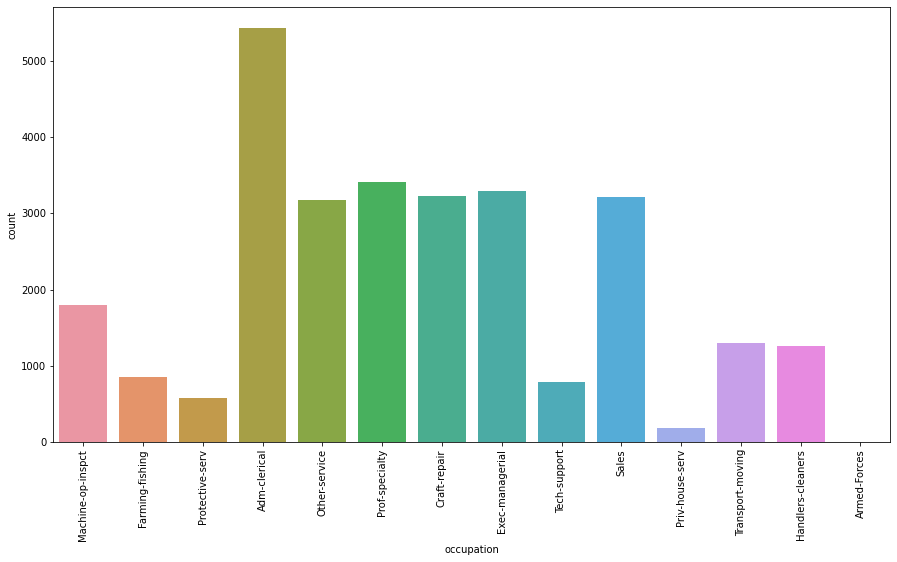

In [57]:
plt.figure(figsize=(15,8))
sb.countplot(data=data,x='occupation')
plt.xticks(rotation=90)
plt.show()


# Insight 
- From above,we can say that most of the people's occupation is "Adm-clerical" in overall view
- Least no.of people are working as Armed-Forces

 .

# SEGMENTED UNI- VARIENT ANALYSIS OF OCCUPATION WITH RESPECT TO GENDER

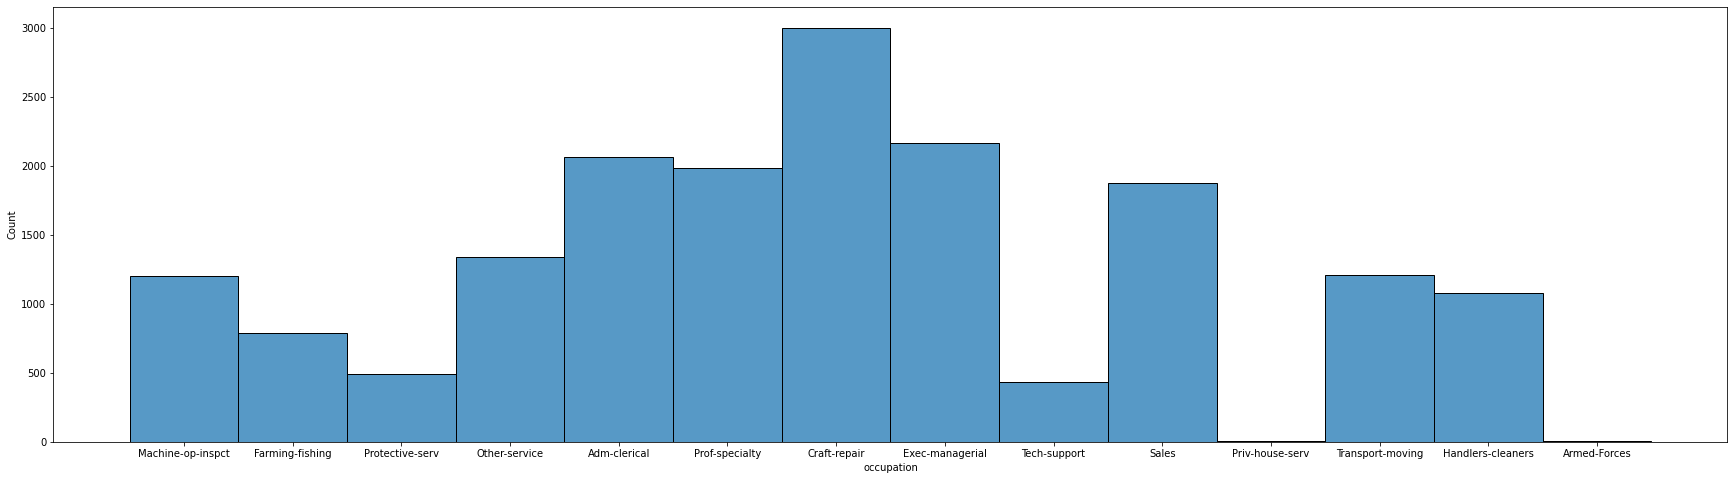

In [58]:
# Segmented uni-varient analysis with respect to male
plt.figure(figsize=(30,8))
sb.histplot(data[data.gender=='Male']['occupation'],bins=14)
plt.show()

# Insight 
- From above, we can say that most of the males occupation was "Craft -repair"
- Least no.of males are working as priv-house-serv and Armed-Forces

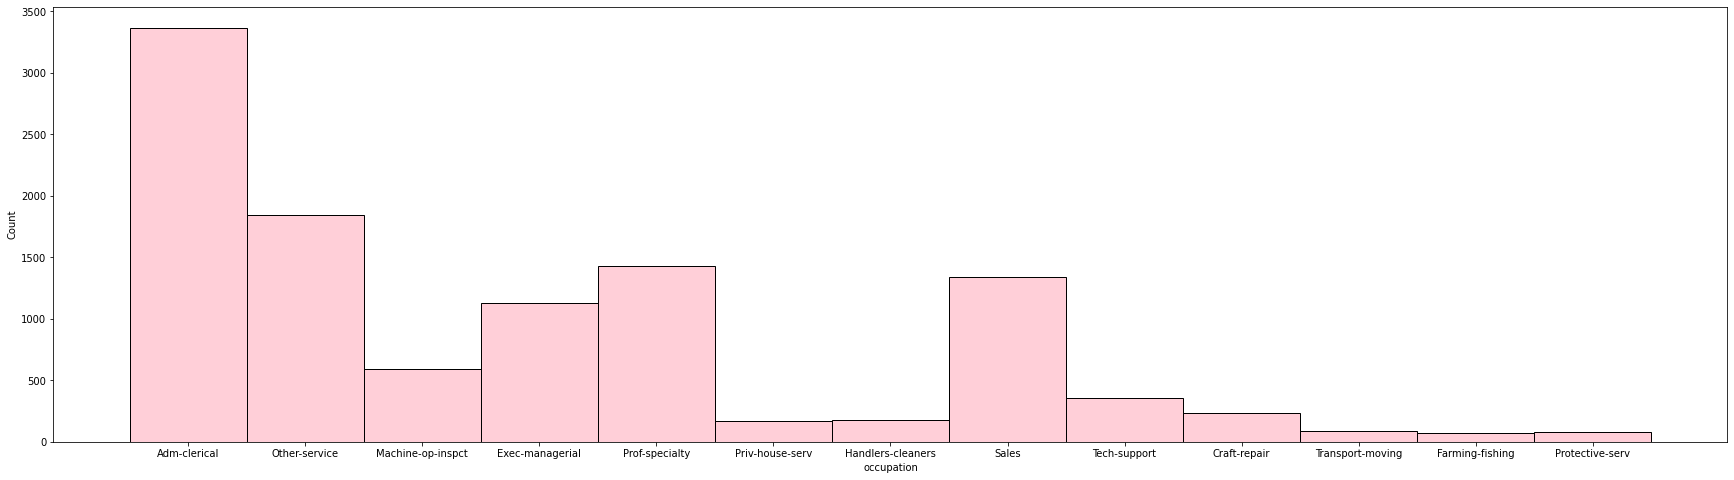

In [59]:
# Segmented uni-varient analysis with respect to female
plt.figure(figsize=(30,8))
sb.histplot(data[data.gender=='Female']['occupation'],bins=14,color="pink")
plt.show()

# Insight 
- From above,we can conclude that most of the female's occupation is "Adm-clerical"
- Least no.of female's are working in Farming-Fishing

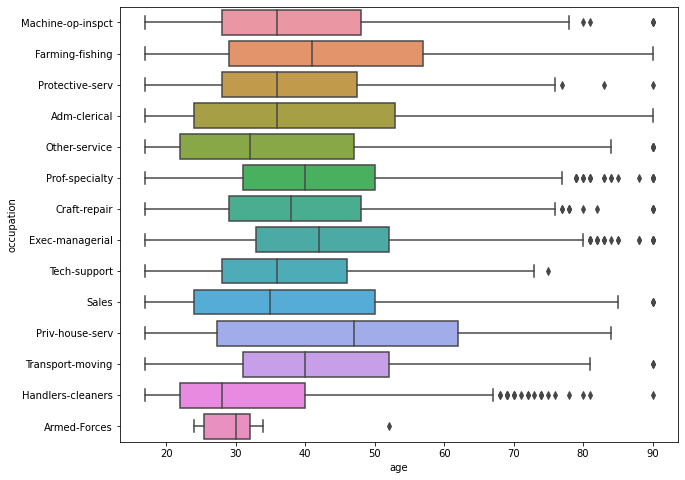

In [60]:
plt.figure(figsize=(10,8))
sb.boxplot(x=data['age'],y=data['occupation'])
plt.show()

# Insight
- After seeing the age distribuation pattern, we can conclude that very young age people (in b/w 25-30) mostly in Handlers-cleaners and Other services

- Aged people(more than 45) are working as Priv-house-serv

# QUARTILES

## 25% or First Quartile

In [61]:
data.shape

(28523, 16)

In [62]:
data[data.age<=27].shape

(7490, 16)

In [63]:
(7490/28523)*100 # showing 25% or first quartile of age 

26.259509869228342

## 50% or Second Quartile or Median

In [64]:
data[data.age<=37].shape

(14298, 16)

In [65]:
(14298/28523)*100

50.12796690390211

## 75% or Third Quartile

In [66]:
data[data.age<=50].shape

(21739, 16)

In [67]:
(21739/28523)*100

76.21568558707008

In [68]:
data['age'].value_counts().reset_index()

,age,count
0,19,821
1,25,811
2,26,769
3,29,763
4,28,761
...,...,...
67,83,10
68,82,9
69,88,6
70,85,5


## VISUALIZATION OF QUARTILES WITH RESPECT TO AGE

<Axes: xlabel='age'>

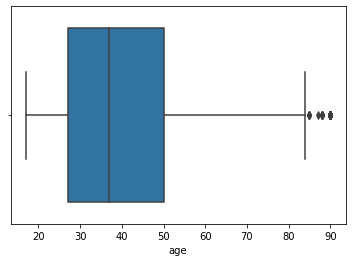

In [69]:
sb.boxplot(data=data,x='age')

- From above, we can see that some outliers are their in upper whisker side

## IQR

In [70]:
iqr = 50-27
iqr

23

In [71]:
uw =50+1.5*iqr
lw=27-1.5*iqr
print(uw)# Upper Whisker
print(lw)# Lower whisker

84.5
-7.5


## Fixing outliers 

- If the value of age greater than the upper whisker then we update them with upper whisker

In [72]:
data['age']=np.where(data['age']>uw,uw,data['age'])

In [73]:
data['age']

1        25.0
3        38.0
4        28.0
5        44.0
6        18.0
         ... 
48820    30.0
48823    45.0
48825    72.0
48832    43.0
48839    27.0
Name: age, Length: 28523, dtype: float64

<Axes: xlabel='age'>

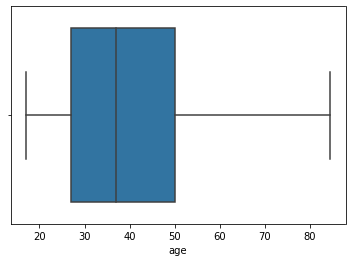

In [74]:
sb.boxplot(data=data,x='age')

- From above, we can see that ouutliers are removed

# UNI - VARIENT ANALYSIS OF AGE

## Histogram

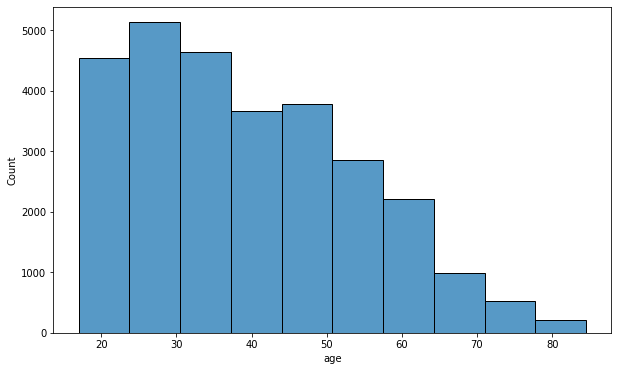

In [75]:
plt.figure(figsize=(10,6))
sb.histplot(data['age'],bins=10)
plt.show()


## Insight
- From above, we can say that most of the people are young having age 15-25

# SEGMENTED UNI-VARIENT ANALYSIS OF AGE WITH RESPECT TO GENDER

<Axes: xlabel='age', ylabel='Count'>

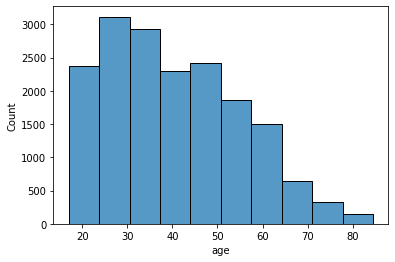

In [76]:
sb.histplot(data[data.gender=='Male']['age'],bins=10)

# Insight
- From above, we can see that 25-30 age group males are in the data

<AxesSubplot: xlabel='age', ylabel='Count'>

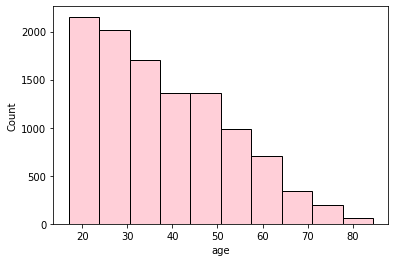

In [169]:
sb.histplot(data[data.gender=='Female']['age'],bins=10,color="pink")

# Insight
-  From above fig,we consider that young females are higher in number

# Box plot

<AxesSubplot: xlabel='age', ylabel='gender'>

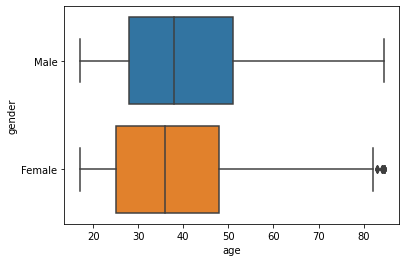

In [170]:
sb.boxplot(x=data['age'],y=data['gender'])

# Insight 
- Females are younger compared to males

In [171]:
data.groupby('gender')['age'].describe()

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
Female,10880.0,37.843428,14.830090,17.0,25.0,36.0,48.0,84.5
Male,17643.0,40.235618,14.790926,17.0,28.0,38.0,51.0,84.5


# Workclass

In [172]:
data['workclass'].value_counts().reset_index()

,workclass,count
0,Private,21528
1,Self-emp-not-inc,2173
2,Local-gov,1845
3,State-gov,1228
4,Self-emp-inc,891
5,Federal-gov,837
6,Without-pay,15
7,Never-worked,6


# UNI VARIENT OF WORKCLASS

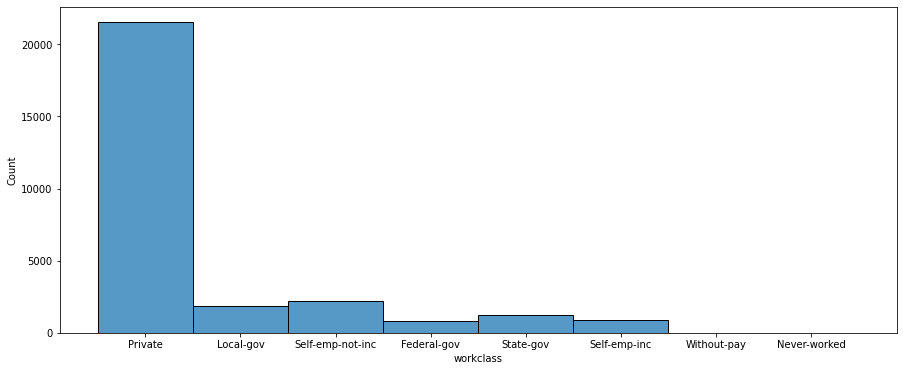

In [173]:
plt.figure(figsize=(15,6))
sb.histplot(data['workclass'],bins=7)
plt.show()

# Insight
- we can see that Private workclass has more count
- less count for Without-pay and Never-worked

# SEGMENTED UNI VARIENT ANALYSIS OF WORKCLASS WITH RESPECT TO GENDER

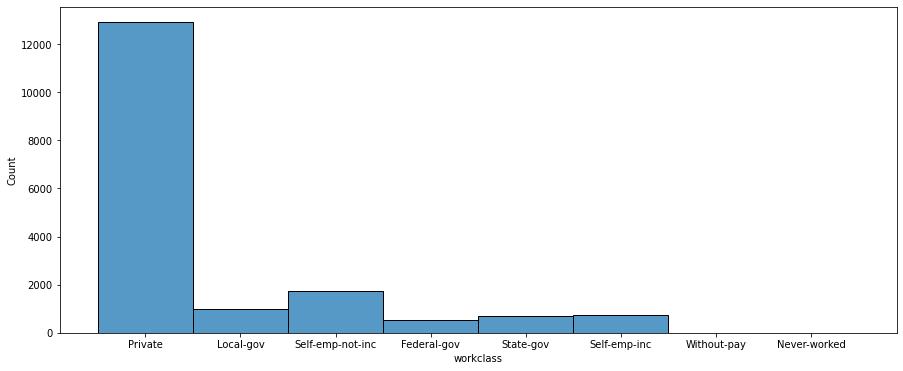

In [174]:
plt.figure(figsize=(15,6))
sb.histplot(data[data.gender=='Male']['workclass'],bins=7)
plt.show()

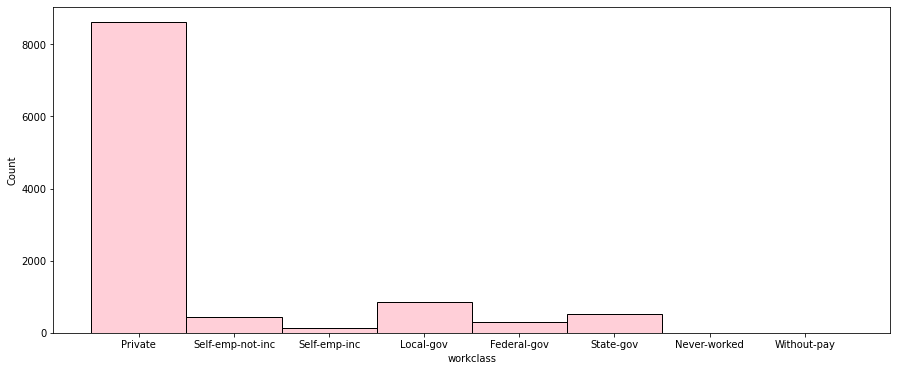

In [175]:
plt.figure(figsize=(15,6))
sb.histplot(data[data.gender=='Female']['workclass'],bins=7,color="pink")
plt.show()

# Insight 
-  From above graphs, we can conclude that most of the males and females work in Private workclass

<AxesSubplot: xlabel='age', ylabel='workclass'>

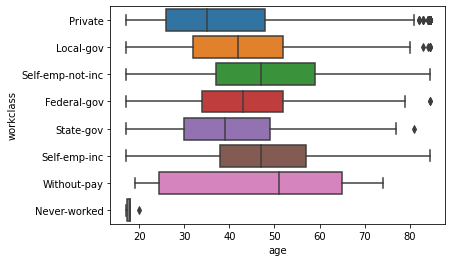

In [176]:
sb.boxplot(x=data['age'],y=data['workclass'])

# Insight
- Younger people are mostly never-worked or work without payment

<AxesSubplot: xlabel='age', ylabel='relationship'>

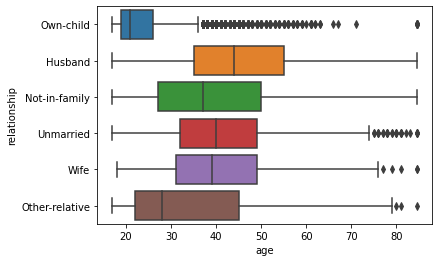

In [177]:
sb.boxplot(x=data['age'],y=data['relationship'])

<AxesSubplot: xlabel='age', ylabel='education'>

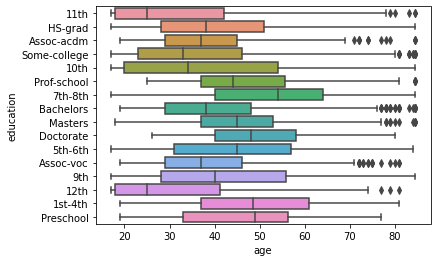

In [178]:
sb.boxplot(x=data['age'],y=data['education'])

<AxesSubplot: xlabel='age', ylabel='marital_status'>

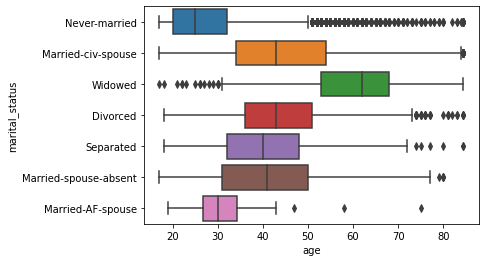

In [179]:
sb.boxplot(x=data['age'],y=data['marital_status'])

<AxesSubplot: xlabel='age', ylabel='race'>

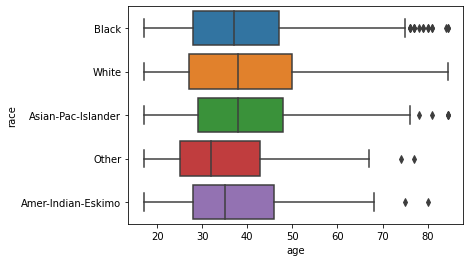

In [180]:
sb.boxplot(x=data['age'],y=data['race'])

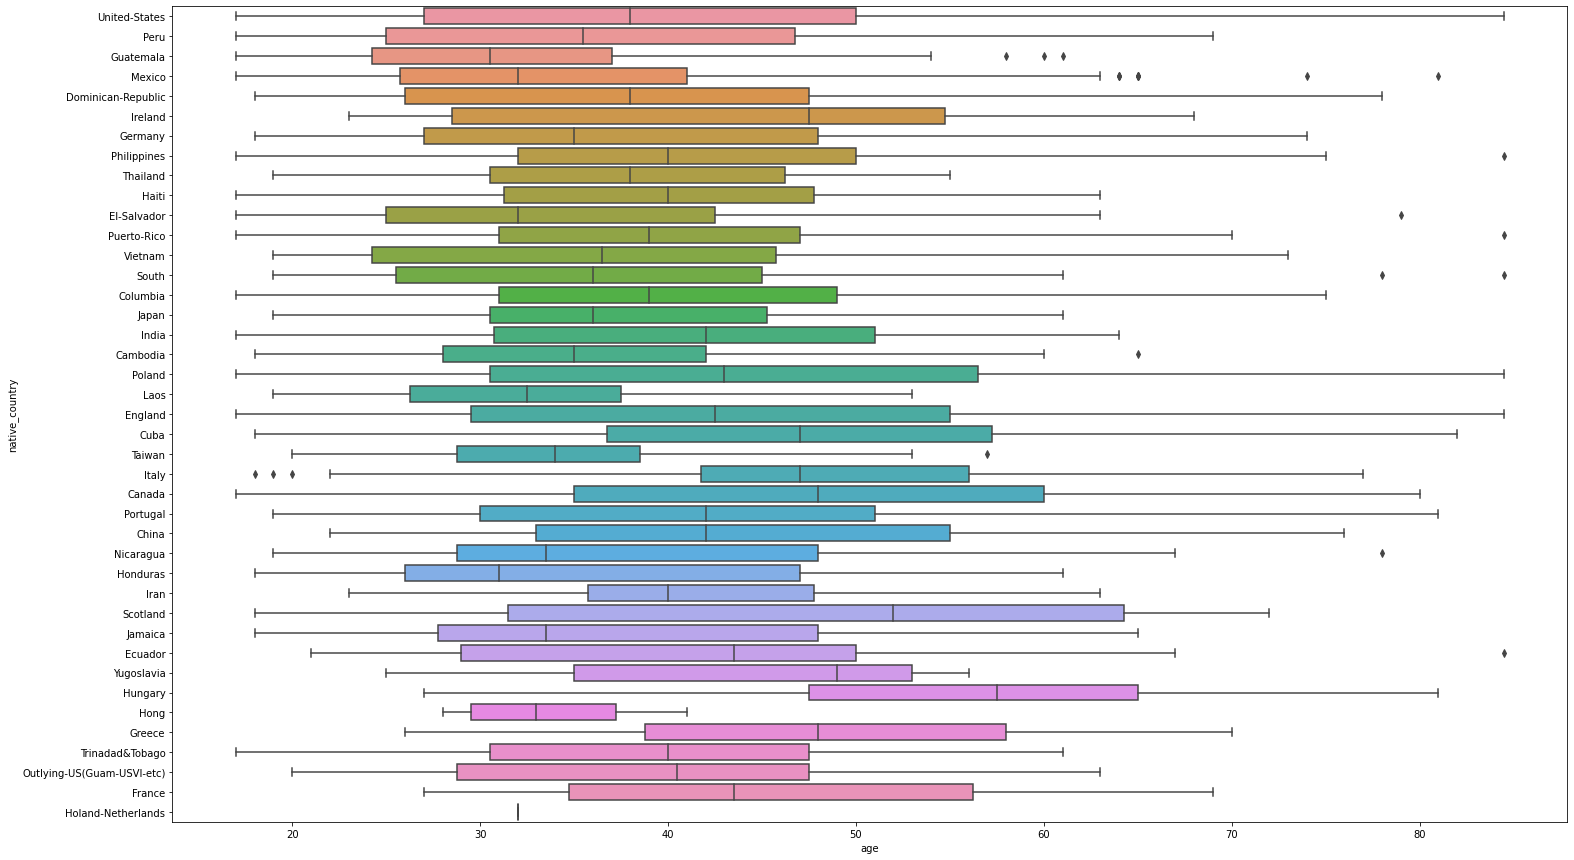

In [181]:
plt.figure(figsize=(25,15))
sb.boxplot(x=data['age'],y=data['native_country'])
plt.show()

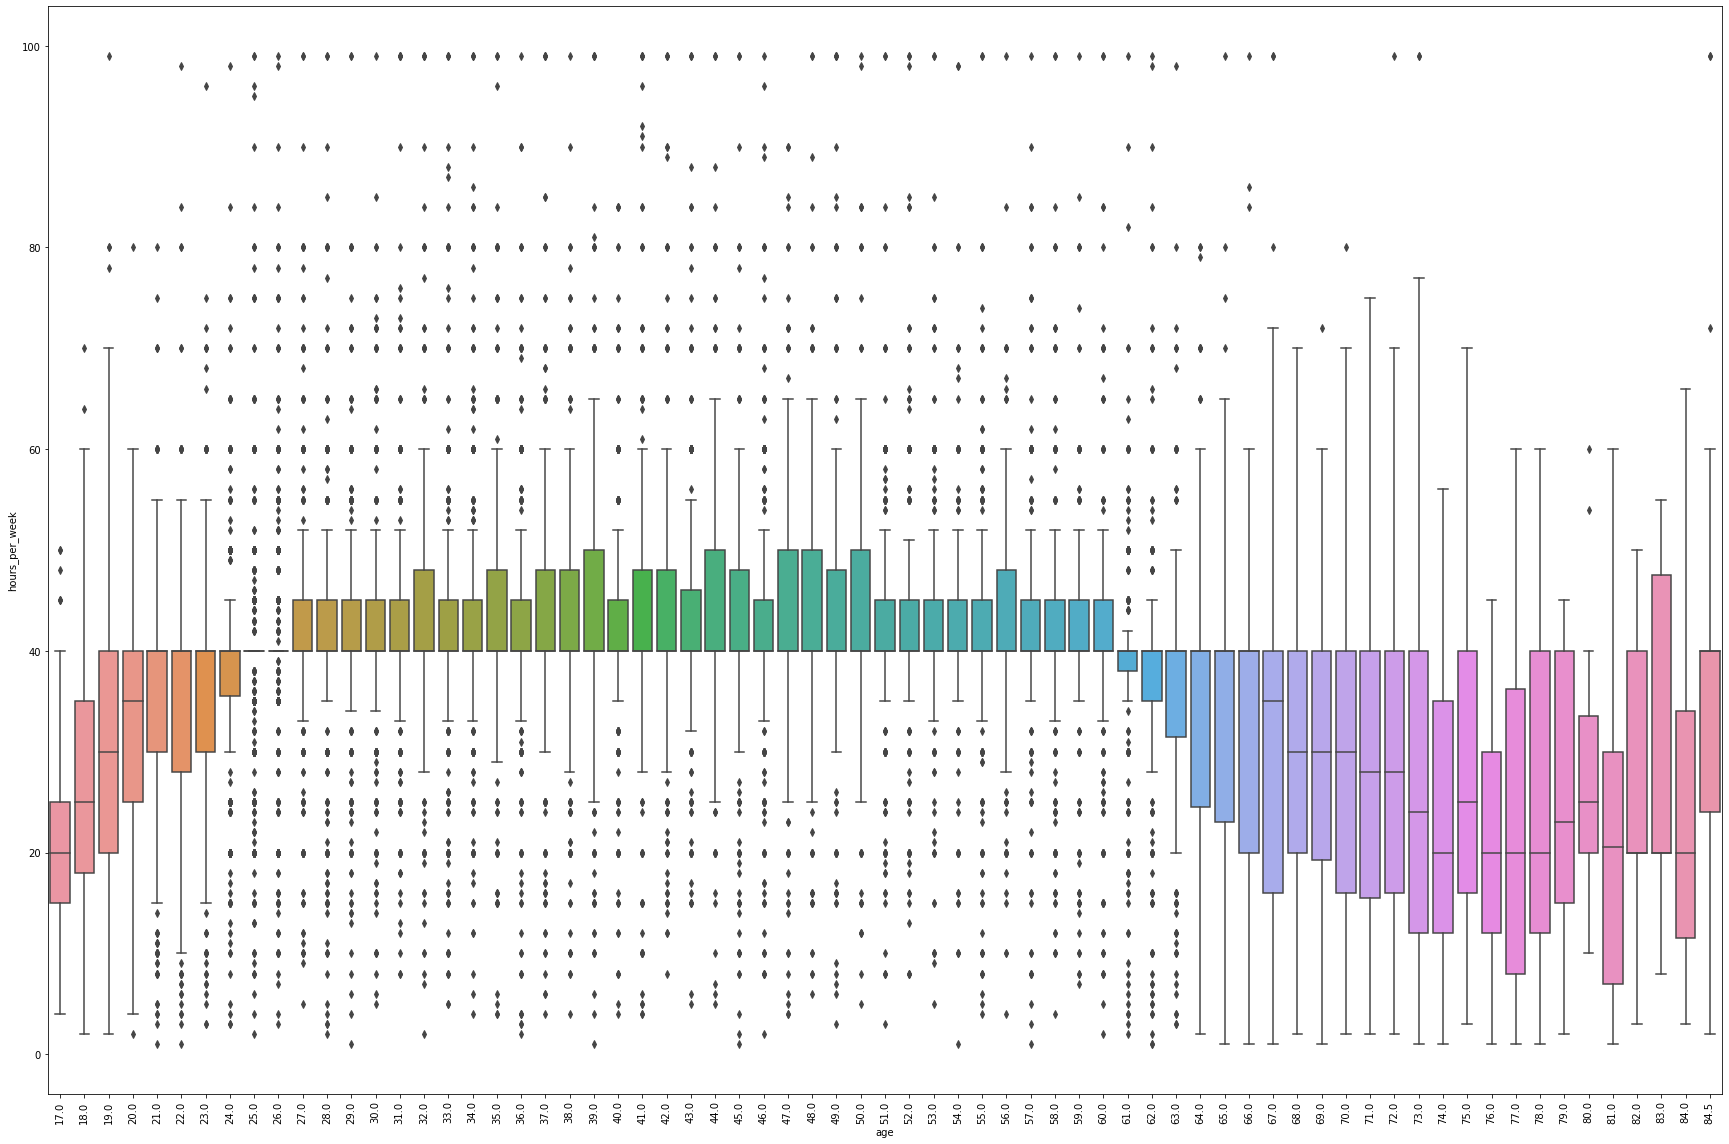

In [182]:
plt.figure(figsize=(30,20))
sb.boxplot(x=data['age'],y=data['hours_per_week'])
plt.xticks(rotation=90)
plt.show()

# BIVARIENT ANALYSIS

- QUANTITATIVE VS QUALITATIVE / QUALITATIVE VS QUANTITATIVE
- QUALITATIVE VS QUALITATIVE
- QUANTITATIVE VS QUANTITATIVE

In [183]:
#1. Qual - Qual
data[['occupation','gender']].value_counts().reset_index()

,occupation,gender,count
0,Adm-clerical,Female,3368
1,Craft-repair,Male,3000
2,Exec-managerial,Male,2167
3,Adm-clerical,Male,2063
4,Prof-specialty,Male,1983
5,Sales,Male,1876
6,Other-service,Female,1842
7,Prof-specialty,Female,1428
8,Sales,Female,1341
9,Other-service,Male,1337


In [184]:
#1. Qual - Qual
data[['occupation','gender']].value_counts().reset_index().pivot_table(index='occupation',columns='gender',values=0).fillna(0)

KeyError: 0

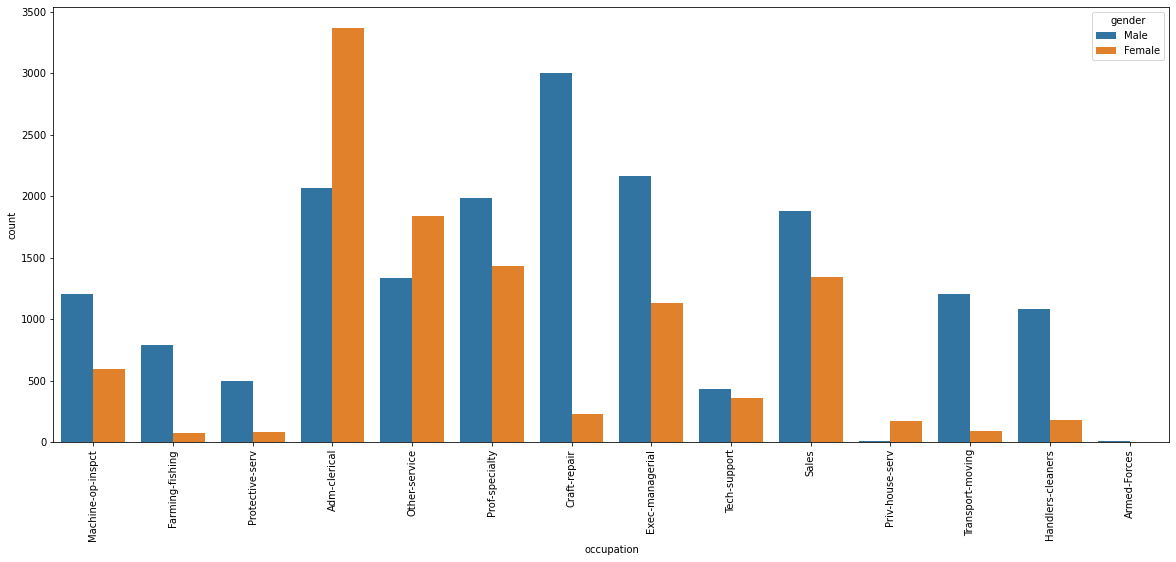

In [ ]:
plt.figure(figsize=(20,8))
sb.countplot(x=data['occupation'],hue=data['gender'])
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Qual-Quant
data.groupby(['occupation'])['age'].mean().reset_index()

,occupation,age
0,Adm-clerical,39.402596
1,Armed-Forces,31.571429
2,Craft-repair,39.480198
3,Exec-managerial,43.101759
4,Farming-fishing,42.990082
5,Handlers-cleaners,32.605807
6,Machine-op-inspct,38.373188
7,Other-service,35.724127
8,Priv-house-serv,45.561798
9,Prof-specialty,41.464087


In [ ]:
# Qual-Quant
chk=data.groupby(['occupation'])['age'].median().reset_index()

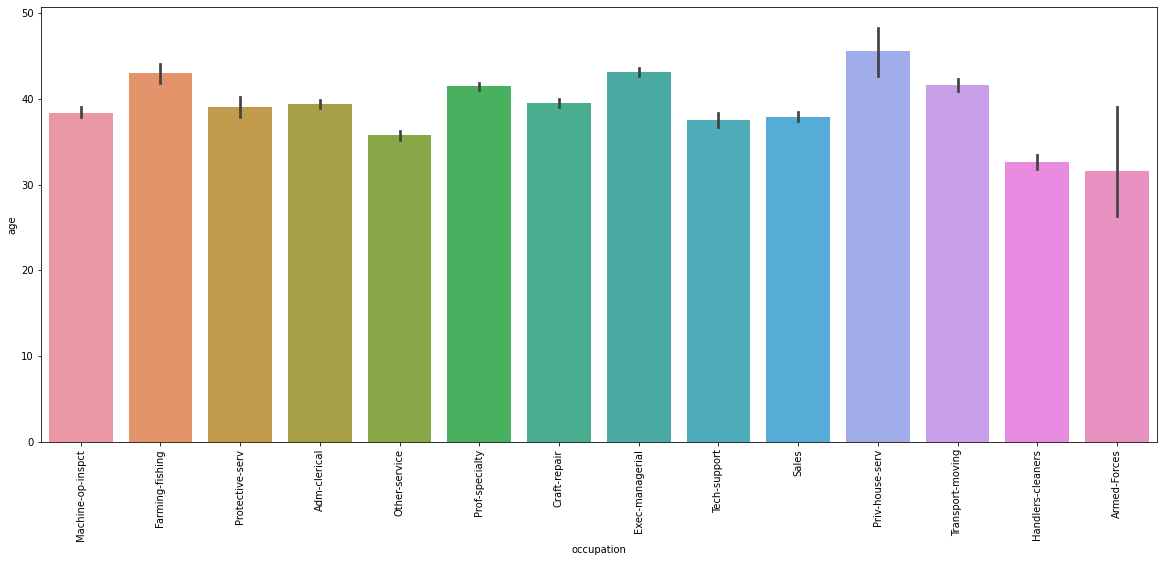

In [ ]:

plt.figure(figsize=(20,8))
sb.barplot(x=data['occupation'],y=data['age'])
plt.xticks(rotation=90)
plt.show()

black line is for measure of std


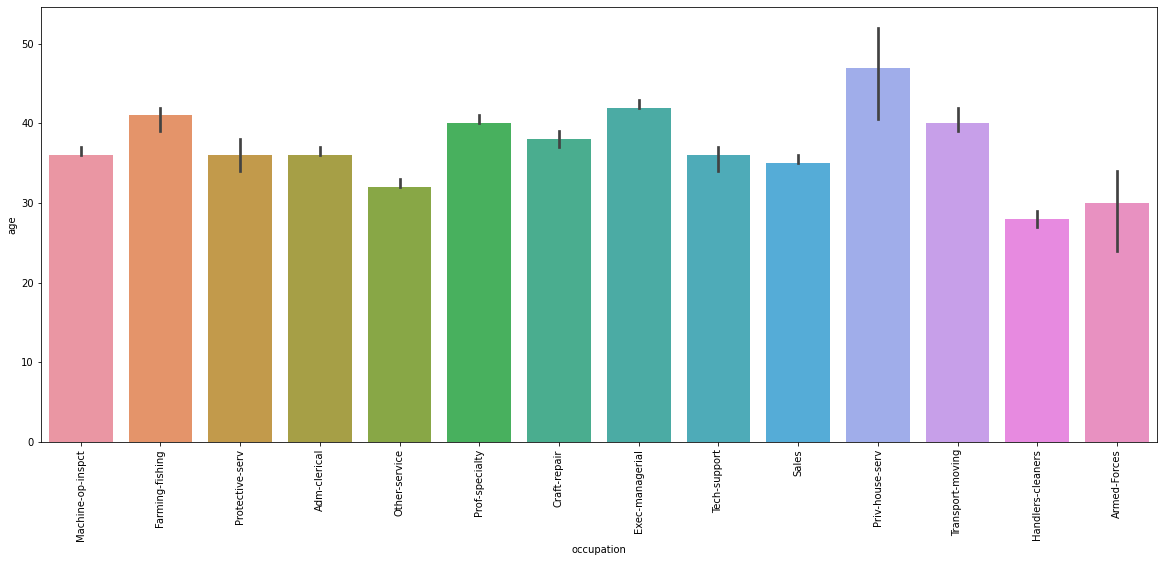

In [ ]:

plt.figure(figsize=(20,8))
sb.barplot(x=data['occupation'],y=data['age'],estimator=np.median)
plt.xticks(rotation=90)
plt.show()

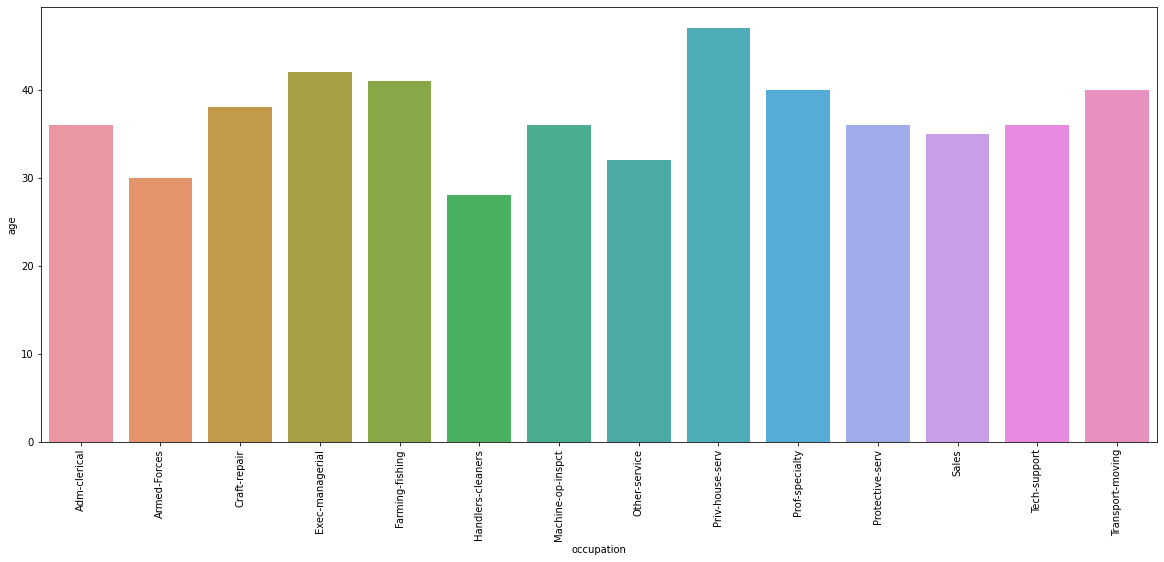

In [ ]:
# remove black lines
plt.figure(figsize=(20,8))
sb.barplot(x=chk['occupation'],y=chk['age'])
plt.xticks(rotation=90)
plt.show()

In [ ]:
data[['age','capital_gain']].corr()

,age,capital_gain
age,1.000000,0.114458
capital_gain,0.114458,1.000000


week corr


<AxesSubplot: xlabel='age', ylabel='capital_gain'>

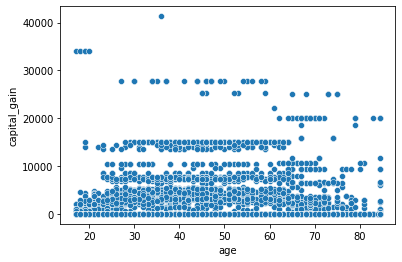

In [ ]:
sb.scatterplot(x=data['age'],y=data['capital_gain'])

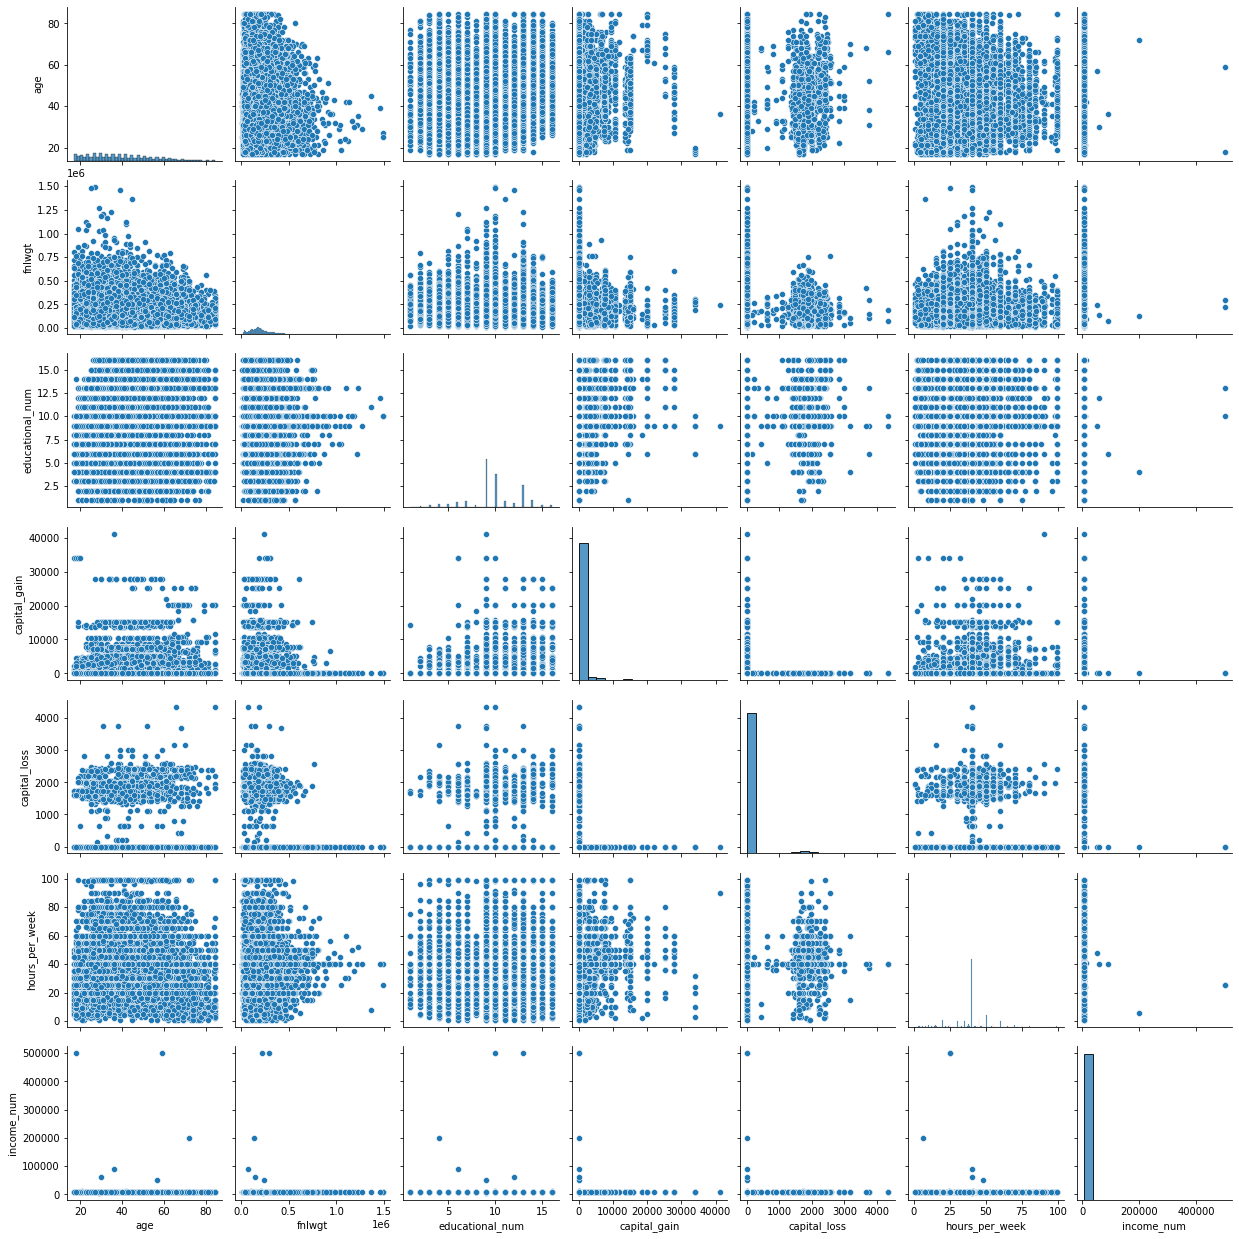

In [ ]:
sb.pairplot(data)

# MULTI VARIENT ANALYSIS


In [ ]:
# CORR MATRIX FOR HEAT MAP
data.corr()

C:\Users\uppada satwik\AppData\Local\Temp\ipykernel_28296\3167930062.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,age,fnlwgt,educational_num,capital_gain,capital_loss,hours_per_week,income_num
age,1.000000,-0.089939,0.024102,0.114458,0.054442,0.052983,0.002979
fnlwgt,-0.089939,1.000000,-0.034446,-0.003399,-0.004366,0.002628,0.002303
educational_num,0.024102,-0.034446,1.000000,0.135079,0.078869,0.151034,0.000666
capital_gain,0.114458,-0.003399,0.135079,1.000000,-0.045846,0.079159,-0.002428
capital_loss,0.054442,-0.004366,0.078869,-0.045846,1.000000,0.048122,-0.002194
hours_per_week,0.052983,0.002628,0.151034,0.079159,0.048122,1.000000,-0.012994
income_num,0.002979,0.002303,0.000666,-0.002428,-0.002194,-0.012994,1.000000


In [ ]:
correlation_matrix = data.corr()

# Find the maximum correlation coefficient and its corresponding variables
max_correlation = correlation_matrix.unstack().sort_values(ascending=False)[len(data.columns):][0]
var1, var2 = np.where(correlation_matrix == max_correlation)

# Print the results
print(f"Maximum Correlation: {max_correlation}")
print(f"Variables with Maximum Correlation: {data.columns[var1[0]]} and {data.columns[var2[0]]}")

Maximum Correlation: 0.07886882676822539
Variables with Maximum Correlation: fnlwgt and educational_num


C:\Users\uppada satwik\AppData\Local\Temp\ipykernel_28296\626827859.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


In [ ]:
correlation_matrix = data.corr()

print(correlation_matrix)
pd.set_option('display.expand_frame_repr', False)

# Find the minimum negative correlation coefficient and its corresponding variables
min_neg_correlation = correlation_matrix.unstack().sort_values(ascending=True)[len(data.columns):][0]
var1, var2 = np.where(correlation_matrix == min_neg_correlation)

# Print the results
print(f"Minimum Negative Correlation: {min_neg_correlation}")
print(f"Variables with Minimum Negative Correlation: {data.columns[var1[0]]} and {data.columns[var2[0]]}")

                      age    fnlwgt  educational_num  capital_gain  \
age              1.000000 -0.089939         0.024102      0.114458   
fnlwgt          -0.089939  1.000000        -0.034446     -0.003399   
educational_num  0.024102 -0.034446         1.000000      0.135079   
capital_gain     0.114458 -0.003399         0.135079      1.000000   
capital_loss     0.054442 -0.004366         0.078869     -0.045846   
hours_per_week   0.052983  0.002628         0.151034      0.079159   
income_num       0.002979  0.002303         0.000666     -0.002428   

                 capital_loss  hours_per_week  income_num  
age                  0.054442        0.052983    0.002979  
fnlwgt              -0.004366        0.002628    0.002303  
educational_num      0.078869        0.151034    0.000666  
capital_gain        -0.045846        0.079159   -0.002428  
capital_loss         1.000000        0.048122   -0.002194  
hours_per_week       0.048122        1.000000   -0.012994  
income_num         

C:\Users\uppada satwik\AppData\Local\Temp\ipykernel_28296\3312632199.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


C:\Users\uppada satwik\AppData\Local\Temp\ipykernel_28296\2752948491.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb.heatmap(data.corr())


<AxesSubplot: >

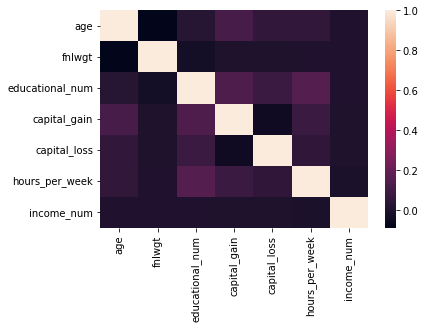

In [ ]:
sb.heatmap(data.corr())

In [2]:
import dtale

# Load the data into a Pandas DataFrame
df = pd.read_csv("cache_dates=adult.csv")

# Generate the report
report = dtale.show(df)

# Open the report in a web browser
report.open()


ModuleNotFoundError: No module named 'dtale'